## <span style="color:#0073C0">Exercise 3.1</span>


Figure 1 shows an uniform cantilever beam. Obtain the approximate expression for the fundamental frequency of the beam using the static deflection polynomial

$$
\varphi_\mathrm{s}(x) = \frac{2Lx^2-x^3}{2L^3}
$$

as the assumed mode shape function. Check if this complies with all relevant boundary conditions and compare with the result obtained for a quarter-cosine function

$$
\varphi_\mathrm{d}(x) = 1-\cos{\left(\frac{\pi x}{2L}\right)}
$$

Which one is the best mode shape function? Why?


<p align="center">
    <img src="resources/3_1.JPG" width="600"> 
</p>
<p></p>
<center>Figure 1: Cantilever beam for Question 3.1.</center>



## <span style="color:#0073C0">Example Solution</span>

<!-- The natural frequency obtained with the first mode shape function is

$$
\omega_0^2 = 14.5\frac{EI}{mL^3} 
$$

The natural frequency obtained with the second mode shape function is

$$
\omega_0^2 = 13.4\frac{EI}{mL^3}
$$ -->



To determine the fundamental frequency neglect gravity effects and focus only on the kinetic and elastic energy of the beam. These are given by

$$
T = \frac{\rho A}{2}\dot{q}^2\int_0^L[\varphi(x)]^2\mathrm{d}x \quad\mathrm{and}\quad V = \frac{EI}{2}{q}^2\int_0^L\left[\frac{\partial^2\varphi(x)}{\partial x^2}\right]^2\mathrm{d}x 
$$

For the first mode shape function --- the static deflection polynomial --- the kinetic energy becomes

$$
T_1 = \frac{\rho A}{2}\dot{q}^2\frac{1}{4L^6}\int_0^L\left( 2Lx^2-x^3 \right)^2\mathrm{d}x = \frac{1}{2}\left(\frac{29}{420}m\right)\dot{q}^2 = \frac{1}{2}\bar{M}_1\dot{q}^2 
$$

and the potential energy becomes

$$
 V_1 = \frac{EI}{2}{q}^2\frac{1}{4L^6}\int_0^L(4L-6x)^2\mathrm{d}x = \frac{1}{2}\left(\frac{EI}{L^3}\right)q^2 = \frac{1}{2}\bar{K}_1{q}^2 
$$

For the second mode shape function --- the quarter-cosine function --- the kinetic energy expression becomes

$$
T_2 = \frac{\rho A}{2}\dot{q}^2\int_0^L\left[ 1-\cos\left(\frac{\pi x}{2L}\right) \right]^2\mathrm{d}x = \frac{\rho A}{2}\dot{q}^2\int_0^L\left[ \frac{3}{2}+\frac{1}{2}\cos\left(\frac{\pi x}{L}\right)-2\cos\left(\frac{\pi x}{2L}\right) \right]\mathrm{d}x 
$$

$$
T_2 = \frac{1}{2}(0.227m)\dot{q}^2 = \frac{1}{2}\bar{M}_2\dot{q}^2 
$$

and the potential energy becomes

$$
 V_2 = \frac{EI}{2}{q}^2\frac{\pi^4}{16L^4}\int_0^L\left[\cos^2\left(\frac{\pi x}{2L}\right)\right]\mathrm{d}x = \frac{1}{2}\left(\frac{\pi^4}{32}\frac{EI}{L^3}\right)q^2 = \frac{1}{2}\bar{K}_2{q}^2
$$

consequently, the natural frequency obtained with the first mode shape function is

$$
 \omega_0^2 = \frac{\bar{K}_1}{\bar{M}_1} = \frac{420}{29m}\frac{EI}{L^3} = 14.5\frac{EI}{mL^3} 
$$

With the second mode shape function is

$$
\omega_0^2 = \frac{\bar{K}_2}{\bar{M}_2} = \frac{\pi^4}{32\times 0.227m}\frac{EI}{L^3} = 13.4\frac{EI}{mL^3} 
$$

The second shape function produces the better result. According to Rayleigh's theorem this method will always produce results above (or equal to) the true value. Consequently, the lower result will be the better one. It should also be noted that the static deflection polynomial $\varphi_\mathrm{s}(x)$ does not comply with all relevant boundary conditions: the bending moment at $x=L$ is not zero.



## <span style="color:#0073C0">Animation</span>

<IPython.core.display.Javascript object>


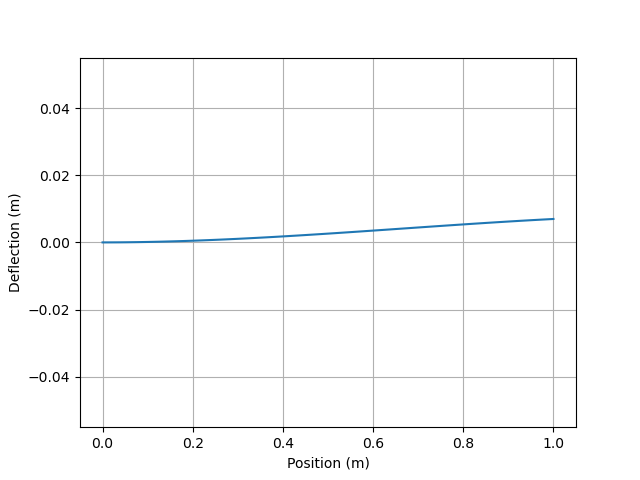

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def shape_function(x, L):
    return ((2 * L * x ** 2) - (x ** 3)) / (2 * L ** 3)

# def shape_function(x,L):
#     return 1-np.cos((x*np.pi)/(2*L))

def calc_props(L, b, rho, E, omega_1, m, v_0, x_0):
    num_points = 100
    num_amps = 10
    
    # Calculate the shape function integral using the trapezoidal rule
    x_values = np.linspace(0, L, num_points)
    integral = np.trapz([shape_function(x, L) for x in x_values], x_values)
    sf_int = integral
    
    w_1 = 2.0 * np.pi * omega_1
    t = w_1 * (L**2) * np.sqrt((3.0 * rho) / (5.0 * E))
    area = b * t
    I = (b * t**3) / 12
    
    # Safeguard to avoid division by zero or negative square root
    sf_int = max(sf_int, 1e-10)

    # Calculate w_1_bar
    w_1_bar_denominator = 1.0 + ((m * shape_function(x_0, L)) / (rho * area * sf_int))
    if w_1_bar_denominator > 0:
        w_1_bar = w_1 / np.sqrt(w_1_bar_denominator)
    else:
        w_1_bar = 0  # or any other suitable value when the denominator is non-positive

    # Calculate A_1 with a safeguard to prevent division by zero
    A_1_denominator = (w_1_bar * rho * area * sf_int)
    if A_1_denominator > 0:
        A_1 = (m * v_0 * shape_function(x_0, L)) / A_1_denominator
    else:
        A_1 = 0  # or any other suitable value when the denominator is non-positive

    points = np.linspace(0, L, num=num_points, endpoint=True)
    amps = np.linspace(0, A_1, num=num_amps, endpoint=True)
    amps = np.append(amps, np.linspace(A_1, 0, num=num_amps, endpoint=True), axis=None)
    amps = np.append(amps, np.linspace(0, -A_1, num=num_amps, endpoint=True), axis=None)
    amps = np.append(amps, np.linspace(-A_1, 0, num=num_amps, endpoint=True), axis=None)
    amps = np.append(amps, amps, axis=None)
    amps = np.append(amps, amps, axis=None)

    sf_points = np.zeros(num_points)
    disps = np.zeros((4 * 4 * num_amps, num_points))

    for k, point in enumerate(points):
        sf_points[k] = shape_function(point, L)

    # Handle potential invalid values in disps
    for k, amp in enumerate(amps):
        disps[k, :] = np.nan_to_num(sf_points * amp)

    h_height = L * 1e3 / 5
    h_width = L * 1e3 / 40

    return t, A_1, points, disps, h_height, h_width, w_1_bar

# Create a figure and axis for the animation
fig, ax = plt.subplots()
plt.xlabel('Position (m)')
plt.ylabel('Deflection (m)')
plt.grid()

# Parameters for the beam deflection
L = 1.0  # Length of the beam
b = 0.05  # Width of the beam
rho = 7850  # Density of the material
E = 2.1e11  # Young's Modulus
omega_1 = 50.0  # Angular frequency
m = 10.0  # Mass
v_0 = 5  # Initial velocity
x_0 = 1 * L  # Initial position

# Calculate properties
t, A_1, points, disps, h_height, h_width, w_1_bar = calc_props(L, b, rho, E, omega_1, m, v_0, x_0)

# Initialize the plot
line, = ax.plot(points, disps[0, :])

# Define the number of frames
num_frames = disps.shape[0]

def animate(i):
    # Update the plot with the ith displacement data
    line.set_ydata(disps[i, :])
    return line

# Create an animation
ani = animation.FuncAnimation(fig, animate, frames=num_frames, interval=100, blit=True, repeat=True)

# Show the animation
plt.show()
